In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#https://matplotlib.org/3.1.0/tutorials/index.html
#https://seaborn.pydata.org/tutorial.html

In [1]:
#Tutorials from the Home-page of the Bigquery from google.
#https://cloud.google.com/bigquery/docs/tutorials
#Ensure pip install --upgrade google-cloud-bigquery[pandas] this is installed initally.
#set GOOGLE_APPLICATION_CREDENTIALS=[PATH], on CMD by using the servive key
from google.cloud import bigquery

# Creating an object.
client = bigquery.Client()

# Reference to dataset.
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# Fetching data.
dataset = client.get_dataset(dataset_ref)

In [67]:
#https://cloud.google.com/bigquery/docs/reference/libraries#client-libraries-install-python
#Now listing the dataset.
tables = list(client.list_tables(dataset))
table_name = 'Chicago_Taxi_Trips'

In [68]:
#Retriving the dara from public data (chicago_taxi_trips/taxi_trips).
#Table just to et basic idea about data
table_ref = dataset_ref.table("taxi_trips")

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,5617797925fa2ea420e31bde7804daf27fcb8536,73c788fff8c6a38a113b2a002b98894b888233f223d034...,2015-04-17 15:00:00+00:00,2015-04-17 15:00:00+00:00,0,0.0,None,None,None,None,...,0.0,1056.0,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,5618c6ea5e53573cc6c391eedfd30626f28120a6,803c154120d7dbec20a6e92780e4fd276ae330a9cd3185...,2014-07-27 03:15:00+00:00,2014-07-27 03:15:00+00:00,0,0.0,None,None,None,None,...,0.0,2481.0,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
2,561eb8269316eeafa8ae5c1d82aedfd6eb6b9d14,19adbf30524c6579e4386e81001f72b9973a747ac9753a...,2015-10-06 19:30:00+00:00,2015-10-06 19:30:00+00:00,0,0.0,None,None,None,None,...,0.0,1265.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,56208d54fa681a6cae78a0974a0a5f266b470243,f4bc2acfbb68d505b7ca37f8553ab1fc28a2686429b55d...,2015-12-07 13:00:00+00:00,2015-12-07 13:00:00+00:00,0,0.0,None,None,None,None,...,0.0,3985.0,Cash,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,562d6dcd0c9d867fbfbf672212b9b5138d282962,9bc3b89d49a30e5990cd30232c8caf69a5774903e9de81...,2016-01-13 16:45:00+00:00,2016-01-13 16:45:00+00:00,0,0.0,None,None,None,None,...,0.0,8130.0,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


In [5]:
#Getting the taxi trips over different years.
#https://googleapis.github.io/google-cloud-python/latest/bigquery/index.html
trips_per_year_query = """
                       SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
                              COUNT(1) AS num_trips
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY year
                       ORDER BY year
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1000000000)
query_job = client.query(trips_per_year_query, job_config=safe_config)

#https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
trips_per_year = query_job.to_dataframe()
print(trips_per_year)

   year  num_trips
0  2013   26870287
1  2014   31021726
2  2015   27400744
3  2016   19878276
4  2017    7689021


[Text(0.5, 1.0, 'chicago taxi total trips trend')]

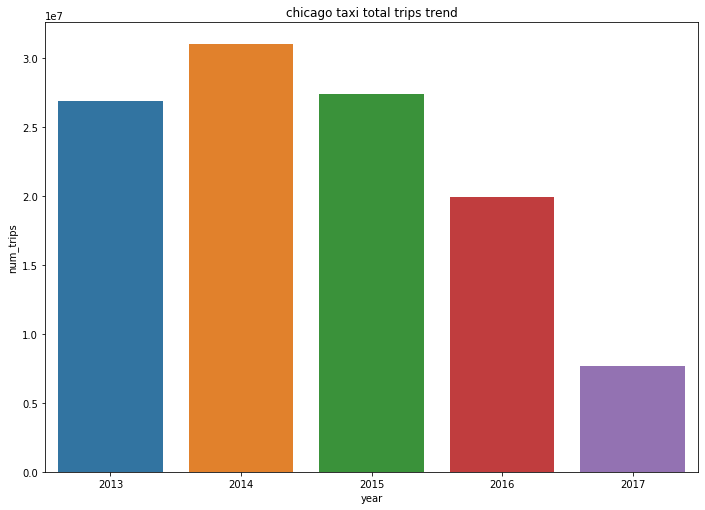

In [7]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="year", y="num_trips", data=trips_per_year)
ax.set(title="chicago taxi total trips trend")

In [70]:
#Looking at the above table we can see number of trips-per-year is in order 2014>2015>2013>2016>2017.
#https://www.governing.com/gov-data/car-ownership-numbers-of-vehicles-by-city-map.html
#Above website shows us that vehicles-per-household increased in the year 2016 in chicago and all over USA and also the rise of UBER in 2016,resulted in sudden Dip in number-of-trips.
#Due to incomplete data of year 2017 data is unreliable for this year. 
tripsInYear2017_per_month_query = """
                                       SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month, 
                                       COUNT(1) AS num_trips
                                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                                       WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2017
                                       GROUP BY month
                                       ORDER BY month
                                  """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1000000000)
query_job = client.query(tripsInYear2017_per_month_query, job_config=safe_config)

per_month_result = query_job.to_dataframe()
print(per_month_result)

   month  num_trips
0      1    1040262
1      2    1016484
2      3    1293745
3      4    1187501
4      5    1132690
5      6    1092557
6      7     925711
7      8         71


In [71]:
#trips in different city by using the pickup loaction in the dataset.
print("10-cityVsTrip in year 2013  ")
city_and_trips = """SELECT COUNT(*) as number_of_rides,
                    pickup_community_area as location
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2013
                    GROUP BY location
                    ORDER BY location ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(city_and_trips, job_config=safe_config)
cityrides = query_job.to_dataframe()
print(cityrides.head(10))
print(" ")
print("10-cityVsTrip in year 2014  ")
city_and_trips = """SELECT COUNT(*) as number_of_rides,
                    pickup_community_area as location
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2014
                    GROUP BY location
                    ORDER BY location ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(city_and_trips, job_config=safe_config)
cityrides = query_job.to_dataframe()
print(cityrides.head(10))
print(" ")
print("10-cityVsTrip in year 2015  ")
city_and_trips = """SELECT COUNT(*) as number_of_rides,
                    pickup_community_area as location
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2015
                    GROUP BY location
                    ORDER BY location ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(city_and_trips, job_config=safe_config)
cityrides = query_job.to_dataframe()
print(cityrides.head(10))
print(" ")
print("10-cityVsTrip in year 2016  ")
city_and_trips = """SELECT COUNT(*) as number_of_rides,
                    pickup_community_area as location
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2016
                    GROUP BY location
                    ORDER BY location ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(city_and_trips, job_config=safe_config)
cityrides = query_job.to_dataframe()
print(cityrides.head(10))

10-cityVsTrip in year 2013  
   number_of_rides  location
0          4646758       NaN
1            90416       1.0
2            83025       2.0
3           431814       3.0
4           127130       4.0
5           192152       5.0
6          1931835       6.0
7          1580673       7.0
8          7251588       8.0
9              797       9.0
 
10-cityVsTrip in year 2014  
   number_of_rides  location
0          4527054       NaN
1           108807       1.0
2           108704       2.0
3           494415       3.0
4           154900       4.0
5           217370       5.0
6          2083481       6.0
7          1703639       7.0
8          8710502       8.0
9              909       9.0
 
10-cityVsTrip in year 2015  
   number_of_rides  location
0          4226875       NaN
1            95006       1.0
2            88127       2.0
3           391640       3.0
4           112246       4.0
5           144960       5.0
6          1546504       6.0
7          1220882       7.0
8         

In [72]:
'''We can see a pattern of increase in the number of trips from the year 2013 to 2014 and there by decrease in trips in 2015 and 2016 duw to the rise of the cab-sharing apps like UBER and LYFT in USA for a lower price than a taxi '''

'We can see a pattern of increase in the number of trips from the year 2013 to 2014 and there by decrease in trips in 2015 and 2016 duw to the rise of the cab-sharing apps like UBER and LYFT in USA for a lower price than a taxi '

In [73]:
#Getting the trips per day info.
trips_per_day = """SELECT COUNT(*) as number_of_rides,
                   DATE_TRUNC(DATE(trip_start_timestamp), WEEK) as date
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   GROUP BY date
                   ORDER BY date ASC;
                """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(trips_per_day, job_config=safe_config)
dayrides = query_job.to_dataframe()
print(dayrides)

     number_of_rides        date
0             231336  2012-12-30
1             325667  2013-01-06
2             366214  2013-01-13
3             407147  2013-01-20
4             395155  2013-01-27
5             417133  2013-02-03
6             444215  2013-02-10
7             488276  2013-02-17
8             493521  2013-02-24
9             496742  2013-03-03
10            578932  2013-03-10
11            541598  2013-03-17
12            419372  2013-03-24
13            452977  2013-03-31
14            503128  2013-04-07
15            520122  2013-04-14
16            508375  2013-04-21
17            493533  2013-04-28
18            497805  2013-05-05
19            510734  2013-05-12
20            531185  2013-05-19
21            502834  2013-05-26
22            552077  2013-06-02
23            561233  2013-06-09
24            540067  2013-06-16
25            558554  2013-06-23
26            470219  2013-06-30
27            523040  2013-07-07
28            578042  2013-07-14
29        

In [74]:
'''Per day trips increased in the years 2013 and 2014 and decreased thereafter,because as stated above itself which is increase in number of vehicles in USA and also rise of  Giants like UBER'''

'Per day trips increased in the years 2013 and 2014 and decreased thereafter,because as stated above itself which is increase in number of vehicles in USA and also rise of  Giants like UBER'

In [75]:
#Getiing info on tip the driver makes in accoundance with the distance of trip.
tips_miles =   """ SELECT trip_miles AS distance, 
                   SUM(tips) as total_tips
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   GROUP BY distance
                   ORDER BY distance ASC;
               """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(tips_miles, job_config=safe_config)
tipdistance = query_job.to_dataframe()
print(tipdistance.head(40))

    distance    total_tips
0        NaN  2.528900e+04
1       0.00  4.353079e+09
2       0.01  1.247300e+05
3       0.02  1.940540e+05
4       0.03  4.222410e+05
5       0.04  9.156160e+05
6       0.05  1.496076e+06
7       0.06  2.044626e+06
8       0.07  2.635001e+06
9       0.08  2.997594e+06
10      0.09  3.197102e+06
11      0.10  2.744233e+08
12      0.11  3.350438e+06
13      0.12  3.248845e+06
14      0.13  3.058875e+06
15      0.14  2.862960e+06
16      0.15  2.651725e+06
17      0.16  2.568212e+06
18      0.17  2.459925e+06
19      0.18  2.226480e+06
20      0.19  2.050977e+06
21      0.20  1.490751e+08
22      0.21  1.809031e+06
23      0.22  1.715414e+06
24      0.23  1.595488e+06
25      0.24  1.532168e+06
26      0.25  1.469775e+06
27      0.26  1.432105e+06
28      0.27  1.418606e+06
29      0.28  1.548191e+06
30      0.29  1.506232e+06
31      0.30  1.134086e+08
32      0.31  1.497163e+06
33      0.32  1.452084e+06
34      0.33  1.397855e+06
35      0.34  1.409488e+06
3

In [76]:
"""we can see that somewhat moderate distance has highest tip recorded"""

'we can see that somewhat moderate distance has highest tip recorded'

In [8]:
#Getting info on payment mode generally used.
payment_types_query = """ 
                       SELECT payment_type AS payment_mode, 
                              COUNT(1) AS number_of_payments
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY payment_mode
                       ORDER BY payment_mode
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1000000000)
query_job = client.query(payment_types_query, job_config=safe_config)

paymentmode = query_job.to_dataframe()
print(paymentmode)

  payment_mode  number_of_payments
0         Cash            67703399
1  Credit Card            44087311
2      Dispute               61094
3       Mobile                 396
4    No Charge              720341
5        Pcard               29700
6       Prcard               14164
7      Unknown              243626
8     Way2ride                  23


[Text(0.5, 1.0, 'chicago taxi payment trend')]

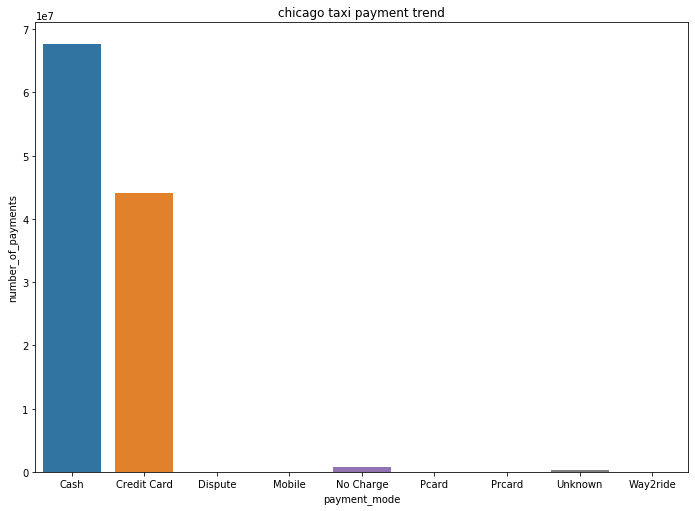

In [9]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="payment_mode", y="number_of_payments", data=paymentmode)
ax.set(title="chicago taxi payment trend")

In [78]:
"""As we can see Cash and Credit Cards are the most popular mode of transaction"""

'As we can see Cash and Credit Cards are the most popular mode of transaction'

In [12]:
# Now getting different modes of payments used during certain years.
print('payment modes in the year 2013')
payment_types_query = """ 
                       SELECT payment_type AS payment_mode, 
                              COUNT(1) AS number_of_payments
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2013
                       GROUP BY payment_mode
                       ORDER BY payment_mode
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1893728257)
query_job = client.query(payment_types_query, job_config=safe_config)

paymentmode_2013 = query_job.to_dataframe()
print(paymentmode_2013)
print(" ")
print('payment modes in the year 2014')
payment_types_query = """ 
                       SELECT payment_type AS payment_mode, 
                              COUNT(1) AS number_of_payments
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2014
                       GROUP BY payment_mode
                       ORDER BY payment_mode
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1893728257)
query_job = client.query(payment_types_query, job_config=safe_config)

paymentmode_2014 = query_job.to_dataframe()
print(paymentmode_2014)
print(" ")
print('payment modes in the year 2015')
payment_types_query = """ 
                       SELECT payment_type AS payment_mode, 
                              COUNT(1) AS number_of_payments
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2015
                       GROUP BY payment_mode
                       ORDER BY payment_mode
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1893728257)
query_job = client.query(payment_types_query, job_config=safe_config)

paymentmode_2015 = query_job.to_dataframe()
print(paymentmode_2015)
print(" ")
print('payment modes in the year 2016')
payment_types_query = """ 
                       SELECT payment_type AS payment_mode, 
                              COUNT(1) AS number_of_payments
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2016
                       GROUP BY payment_mode
                       ORDER BY payment_mode
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1893728257)
query_job = client.query(payment_types_query, job_config=safe_config)

paymentmode_2016 = query_job.to_dataframe()
print(paymentmode_2016)

payment modes in the year 2013
  payment_mode  number_of_payments
0         Cash            18444945
1  Credit Card             8015663
2      Dispute               21217
3    No Charge              288135
4        Pcard                7973
5       Prcard                 531
6      Unknown               91823
 
payment modes in the year 2014
  payment_mode  number_of_payments
0         Cash            19511485
1  Credit Card            11285898
2      Dispute               12119
3    No Charge              154940
4        Pcard                6690
5       Prcard                1755
6      Unknown               48839
 
payment modes in the year 2015
  payment_mode  number_of_payments
0         Cash            15291718
1  Credit Card            11904929
2      Dispute               10043
3    No Charge              140301
4        Pcard                6396
5       Prcard                2298
6      Unknown               45059
 
payment modes in the year 2016
  payment_mode  number_of_paym

[Text(0.5, 1.0, 'chicago taxi payment trend in 2016')]

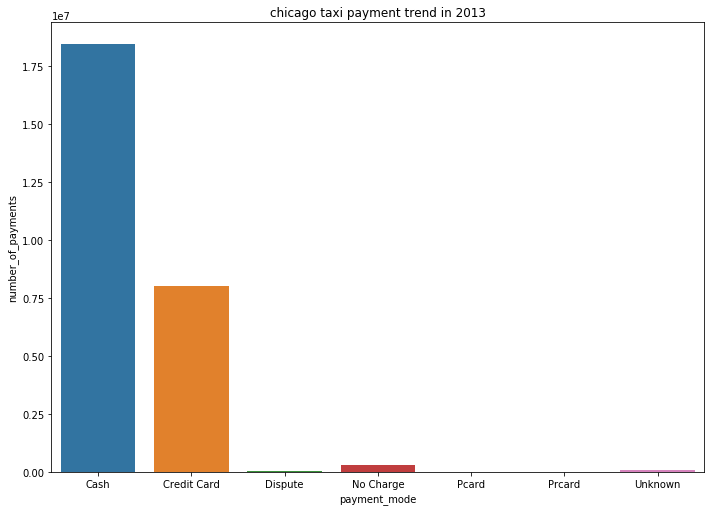

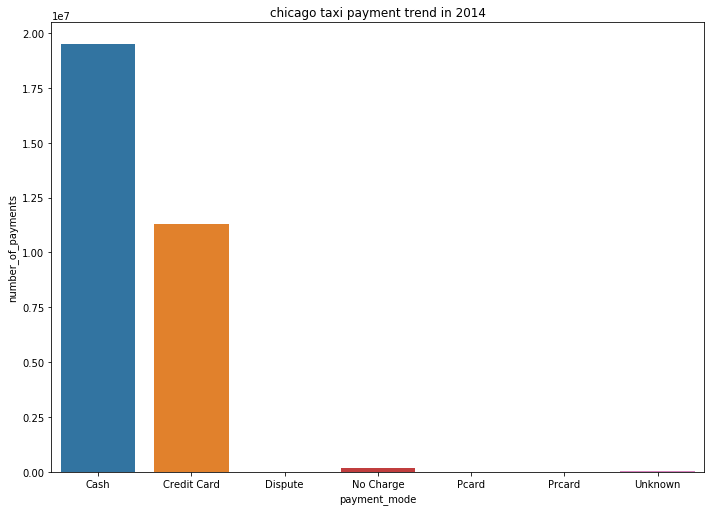

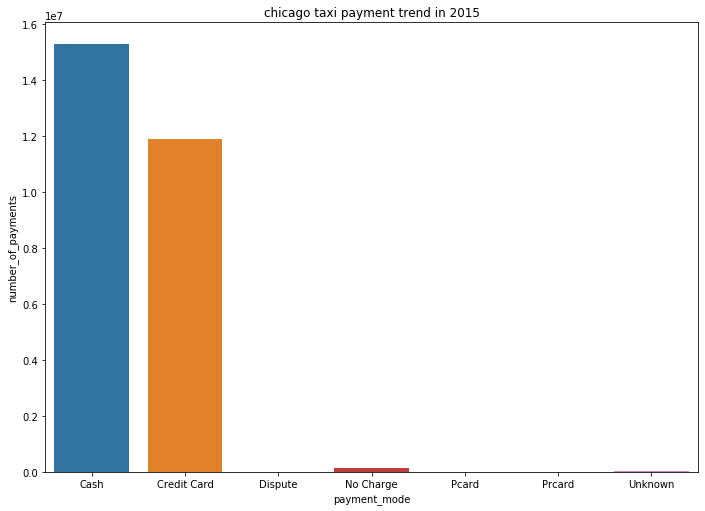

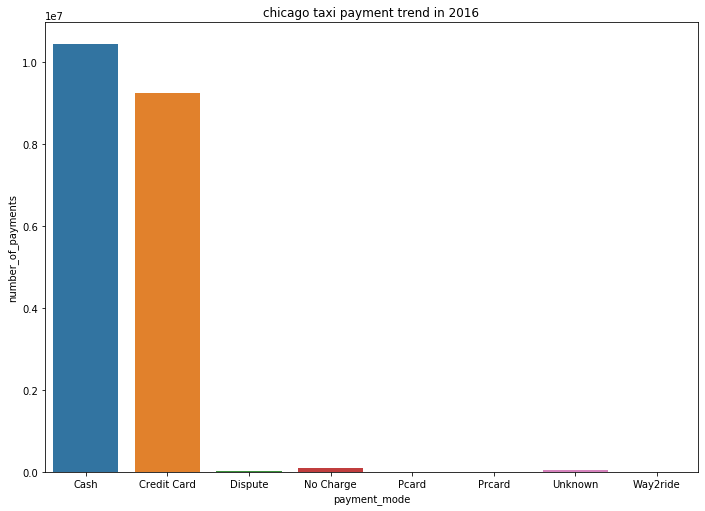

In [14]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="payment_mode", y="number_of_payments", data=paymentmode_2013)
ax.set(title="chicago taxi payment trend in 2013")
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="payment_mode", y="number_of_payments", data=paymentmode_2014)
ax.set(title="chicago taxi payment trend in 2014")
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="payment_mode", y="number_of_payments", data=paymentmode_2015)
ax.set(title="chicago taxi payment trend in 2015")
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.barplot(x="payment_mode", y="number_of_payments", data=paymentmode_2016)
ax.set(title="chicago taxi payment trend in 2016")

In [80]:
"""As we can see cash dominated as a payment mode throught years followed by credit card"""

'As we can see cash dominated as a payment mode throught years followed by credit card'

In [81]:
fares_fixture_query = """SELECT
                            FORMAT('%02.0fm to %02.0fm', min_minutes, max_minutes) AS minutes_range,
                            SUM(trips) AS total_trips,
                            FORMAT('%3.2f', SUM(total_fare) / SUM(trips)) AS average_fare
                            FROM (
                                SELECT
                                MIN(duration_in_minutes) OVER (quantiles) AS min_minutes,
                                MAX(duration_in_minutes) OVER (quantiles) AS max_minutes,
                                SUM(trips) AS trips,
                                SUM(total_fare) AS total_fare
                                FROM (
                                    SELECT
                                    ROUND(trip_seconds / 60) AS duration_in_minutes,
                                    NTILE(10) OVER (ORDER BY trip_seconds / 60) AS quantile,
                                    COUNT(1) AS trips,
                                    SUM(fare) AS total_fare
                                    FROM
                                    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                                    WHERE
                                    ROUND(trip_seconds / 60) BETWEEN 1 AND 90
                                    GROUP BY
                                    trip_seconds,
                                duration_in_minutes
                                    )
                                GROUP BY
                                duration_in_minutes,
                                quantile
                                WINDOW quantiles AS (PARTITION BY quantile)
                               )
                            GROUP BY
                            minutes_range
                            ORDER BY
                            Minutes_range
                        """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=1893728257)
query_job = client.query(fares_fixture_query, job_config=safe_config)

fares = query_job.to_dataframe()
print(fares.head(10))

  minutes_range  total_trips average_fare
0    01m to 09m     50293753       664.62
1    09m to 18m     31706489      1141.71
2    18m to 27m     10291825      2301.31
3    27m to 36m      4695487      3202.48
4    36m to 45m      2455987      3709.86
5    45m to 54m      1349632      4020.95
6    54m to 63m       702834      4289.13
7    63m to 72m       342621      4527.14
8    72m to 81m       164810      4893.22
9    81m to 90m        79299      5215.52


In [82]:
"""So we can see that as the duration of trip is increased so is the average fare."""

'So we can see that as the duration of trip is increased so is the average fare.'

In [83]:
#select AVG(trip_seconds/60)
#FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
#As we have average trip time is around 13 minutes
#Now we can get max, min and avg fares for rides lasting 13 minutes or more VS 13 minutes or less
print('max, min and avg fares for rides lasting 13 minutes or more')
max_min_avg_query = """   SELECT
                          EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS day,
                          FORMAT('%3.2f', MAX(fare)) AS maximum_fare,
                          FORMAT('%3.2f', MIN(fare)) AS minimum_fare,
                          FORMAT('%3.2f', AVG(fare)) AS avg_fare,
                          COUNT(1) AS rides
                        FROM
                          `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE
                          trip_seconds >= 780
                        GROUP BY
                          day
                        ORDER BY
                          day
                  """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2699034625)
query_job = client.query(max_min_avg_query, job_config=safe_config)

fares_range = query_job.to_dataframe()
print(fares_range.head(10))
print('max, min and avg fares for rides lasting 13 minutes or less')
max_min_avg_query = """   SELECT
                          EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS day,
                          FORMAT('%3.2f', MAX(fare)) AS maximum_fare,
                          FORMAT('%3.2f', MIN(fare)) AS minimum_fare,
                          FORMAT('%3.2f', AVG(fare)) AS avg_fare,
                          COUNT(1) AS rides
                        FROM
                          `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE
                          trip_seconds <= 780
                        GROUP BY
                          day
                        ORDER BY
                          day
                  """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2699034625)
query_job = client.query(max_min_avg_query, job_config=safe_config)

fares_range = query_job.to_dataframe()
print(fares_range.head(10))

max, min and avg fares for rides lasting 13 minutes or more
   day maximum_fare minimum_fare avg_fare    rides
0    1    990041.00         0.00  2293.75  4613999
1    2    990042.00         0.00  2465.46  4542218
2    3    990041.00         0.00  2320.45  4704067
3    4    982504.00         0.00  2310.53  5100048
4    5    970208.00         0.00  2272.84  5600671
5    6    990045.00         0.00  2119.91  6348908
6    7    990021.00         0.00  1887.64  5631300
max, min and avg fares for rides lasting 13 minutes or less
   day maximum_fare minimum_fare avg_fare     rides
0    1    996666.00         0.00   849.92  10248886
1    2    989898.00         0.00   848.49   9725356
2    3    927791.00         0.00   830.33  10600317
3    4    999999.00         0.00   828.15  11050553
4    5    940020.00         0.00   825.80  11650563
5    6    972585.00         0.00   814.43  12878582
6    7    992939.00         0.00   812.79  12704345


In [85]:
"""We notice that for trips having travel time greater than average has more of average fare though the number of such rides are small in number."""

'We notice that for trips having travel time greater than average has more of average fare though the number of such rides are small in number.'

In [86]:
#Getting the average speed of taxis between 2014 and 2016 at different hours in a day.
speeds_in_Day_query = """
                           WITH Rides AS
                           (
                               SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS time_of_day, 
                              trip_miles, 
                              trip_seconds
                           FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                               WHERE trip_start_timestamp >= '2014-01-01' AND 
                             trip_start_timestamp <= '2016-12-31' AND 
                             trip_seconds > 0 AND 
                             trip_miles > 0
                           )
                           SELECT time_of_day, 
                           COUNT(1) AS num_trips, 
                           3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_speed
                           FROM Rides
                           GROUP BY time_of_day
                           ORDER BY time_of_day
                      """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2699034625)
query_job = client.query(speeds_in_Day_query, job_config=safe_config)

speeds_avg_in_a_day = query_job.to_dataframe()

print(speeds_avg_in_a_day)

    time_of_day  num_trips  avg_speed
0             0    2220733  18.461431
1             1    1847834  17.866432
2             2    1452141  17.130175
3             3    1054286  16.736885
4             4     696598  20.892527
5             5     565413  26.512792
6             6     753280  23.815296
7             7    1388859  17.645224
8             8    2210689  14.941718
9             9    2608380  15.531860
10           10    2529339  17.635231
11           11    2603282  18.603329
12           12    2823897  17.762699
13           13    2880061  17.237637
14           14    2843174  16.767961
15           15    2892020  15.757695
16           16    3070224  14.534025
17           17    3378958  12.959096
18           18    3813928  12.965152
19           19    3949439  14.770394
20           20    3564727  17.150190
21           21    3163607  19.049006
22           22    3010351  18.770592
23           23    2685529  18.297392


In [87]:
""" We see that taxi drivers usually travel faster in 4am-6am and 8pm-12am"""

' We see that taxi drivers usually travel faster in 4am-6am and 8pm-12am'

In [17]:
#Yearly income of taxi drivers.
yearly_income_query = """SELECT taxi_id,
                    SUM(fare) as yearly_pay,
                    EXTRACT(YEAR FROM trip_start_timestamp) AS year
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    GROUP BY year, taxi_id;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job= client.query(yearly_income_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
income = query_job.to_dataframe()

# View results
print(income.head(30))

                                              taxi_id  yearly_pay  year
0   ec84a47de06d11f386d9d4addf9edcd0211c093c4ccde5...   5261577.0  2013
1   429013bada92513f2d8a2fa3c226446776ee6159dce544...   8782429.0  2013
2   ede88450874f06f67a06c0b2bba8f548410f8be4dbd59d...   1002097.0  2013
3   9068df481fee5a9c7852905ac35bd29287854f7965ce1c...   3765420.0  2013
4   0156573f07d7ebbb61b0edfd4d783d2762fd0cc74d8221...  10634661.0  2013
5   51510e6801fd5dfa9232c990f9578c24febaf1cacdba40...   9358860.0  2013
6   2b46ceca0b867def0d79ffb6871d8f1678cf4b199d9f9e...  10075784.0  2013
7   a5b3beab75842687197791c7d0540875aa7a4501d57805...   7205982.0  2013
8   a9bc5e55dd09e8687769a853fe4e67226f1e16b649e7bc...   6558924.0  2013
9   80e02ffa14d3aa8e99d3fdce86a497a3eabc35005fc496...   1439405.0  2013
10  9e402f28d4da35014d6f3171cf85336476cebfccf79048...   2973422.0  2013
11  020531ad67ef679261206ce9876298202b29824371fcf9...   4327900.0  2013
12  b1b569038610549b618e4fe62e3379b25606f7a3fc6f30...  11026866.

In [89]:
"""We can notice a dip in income during 2015-2016 due to less number of rides."""

'We can notice a dip in income during 2015-2016 due to less number of rides.'

In [90]:
#Now avg income each year
income.groupby('year').yearly_pay.mean()

year
2013    6.023679e+06
2014    5.025668e+06
2015    4.620420e+06
2016    3.601332e+06
2017    2.064944e+06
Name: yearly_pay, dtype: float64

In [91]:
"""Even average income takes a dip in 2016 and 2017"""

'Even average income takes a dip in 2016 and 2017'

In [18]:
#Now median income each year
income.groupby('year').yearly_pay.median()

year
2013    5525678.0
2014    5088252.5
2015    4971754.0
2016    3367970.0
2017    2251600.0
Name: yearly_pay, dtype: float64

In [26]:
#median effect on earnings,in the year 2015
fare_variation_2015_query = """SELECT COUNT(*) as number_of_rides,
                                fare as pay
                                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                                WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2015
                                AND fare<=4971754.0
                                GROUP BY fare
                                ORDER BY number_of_rides ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job= client.query(fare_variation_2015_query , job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
fare_variation_2015 = query_job.to_dataframe()

# View results
print(fare_variation_2015)
print(fare_variation_2015.max())
print(fare_variation_2015.min())

      number_of_rides       pay
0                   1   77089.0
1                   1  667125.0
2                   1   26065.0
3                   1   25045.0
4                   1    5016.0
5                   1    2838.0
6                   1    2328.0
7                   1    8840.0
8                   1    3538.0
9                   1    5432.0
10                  1   23205.0
11                  1    5410.0
12                  1    8948.0
13                  1   11570.0
14                  1    5272.0
15                  1   15770.0
16                  1    8467.0
17                  1    1352.0
18                  1   19002.0
19                  1  200154.0
20                  1     223.0
21                  1   26145.0
22                  1   56500.0
23                  1   55305.0
24                  1   43385.0
25                  1    4408.0
26                  1    7296.0
27                  1    6102.0
28                  1   45454.0
29                  1   28325.0
...     

In [30]:
"""we can see that median income is taking a dip every year from 2013.And also number of trips close to median of given year is more.
Low earning taxis had less number of rides.And we see a dip of 3975088 in the year 2015 WRT its median."""

'we can see that median income is taking a dip every year from 2013.And also number of trips close to median of given year is more.\nLow earning taxis had less number of rides.And we see a dip of 3975088 in the year 2015 WRT its median.'

In [20]:
#getting number of trips to a particular city
city_and_trips_query = """SELECT COUNT(*) as number_of_rides,
                    pickup_community_area as location
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    GROUP BY location
                    ORDER BY location ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(city_and_trips_query, job_config=safe_config)
citytrips = query_job.to_dataframe()
print(citytrips.head(77))

    number_of_rides  location
0          16782342       NaN
1            378175       1.0
2            367825       2.0
3           1643982       3.0
4            481611       4.0
5            651750       5.0
6           6815397       6.0
7           5477208       7.0
8          32104338       8.0
9              3138       9.0
10            52488      10.0
11           131904      11.0
12            22561      12.0
13            58588      13.0
14           219827      14.0
15            80221      15.0
16           389669      16.0
17            17493      17.0
18             5522      18.0
19            29749      19.0
20            14853      20.0
21           285627      21.0
22          1184590      22.0
23            43345      23.0
24          3575711      24.0
25            48070      25.0
26             6083      26.0
27            15766      27.0
28          8481004      28.0
29            13981      29.0
..              ...       ...
47              911      47.0
48        

In [94]:
citytrips.max()

number_of_rides    32104338.0
location                 77.0
dtype: float64

In [95]:
citytrips.min()

number_of_rides    444.0
location             1.0
dtype: float64

In [21]:
"""We see that location=8.0 is the most popular destination among travellers and location=54.0 being least popular"""

'We see that location=8.0 is the most popular destination among travellers and location=54.0 being least popular'

In [37]:
taxi_ride_query = """SELECT taxi_id,
                    COUNT(1) AS number_of_rides
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(HOUR FROM trip_start_timestamp) <=12
                    GROUP BY taxi_id
                    ORDER by taxi_id;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(taxi_ride_query, job_config=safe_config)

taxi_ride_day= query_job.to_dataframe()
print('taxi rides in day-time')
print(taxi_ride_day)

taxi_ride_query = """SELECT taxi_id,
                    COUNT(1) AS number_of_rides
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    WHERE EXTRACT(HOUR FROM trip_start_timestamp)>=12
                    GROUP BY taxi_id
                    ORDER by taxi_id;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(taxi_ride_query, job_config=safe_config)

taxi_ride_not_day= query_job.to_dataframe()
print('taxi rides in night-time')
print(taxi_ride_not_day)


taxi rides in day-time
                                                taxi_id  number_of_rides
0     0004366432bcef5a9526884fdec76bca727b29345266e7...               31
1     0008de7a146802839c9e6059f482d292ebdae13c5c31dd...             3160
2     001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...             5035
3     0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...             1709
4     0041f8f0c91881c1e1913f2548522495fe3c4c719aa67f...                1
5     0044e6c0d091476299b99345501f756b23632a96cbaf40...             2985
6     00752524a4118a162dce62ff49c0eb0f79530d9e0ecb5a...             6910
7     00792d5dbcf63ba172ce8e232d955ed51d7d3f13466aa8...              270
8     0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...             9502
9     008c43f04857eb09949b8ce05458d3fc8848dfd460d925...            16163
10    008ca9f6e7dff925f1a18284fb269fc3c781977db68d15...             8964
11    008dda45db57cb6daa679a86ce8c8149ddc05446d545b1...              482
12    008e09771fc5d90e65eec9

In [ ]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.lineplot(x="taxi_id", y="number_of_rides", data=taxi_ride_day)
ax.set(title="dayrides")
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.lineplot(x="taxi_id", y="number_of_rides", data=taxi_ride_not_day)
ax.set(title="nightrides")

[Text(0.5, 1.0, 'nightrides')]

In [22]:
# how much do people normally tip in a credit card transactions(as tip data is only avaliable for the same).
tip_disturbution_query = """
                        SELECT tips as tip_amount,
                        COUNT(1) AS number_of_times_tipped
                        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE payment_type = 'Credit Card' AND tips <=5000
                        GROUP BY tip_amount
                        ORDER BY tip_amount
                   """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(tip_disturbution_query, job_config=safe_config)

tip_Dis = query_job.to_dataframe()
print(tip_Dis)

      tip_amount  number_of_times_tipped
0            0.0                 2765915
1            1.0                   31765
2            2.0                   20603
3            3.0                    6623
4            4.0                    3230
5            5.0                    7728
6            6.0                    2155
7            7.0                    1974
8            8.0                    5729
9            9.0                    1953
10          10.0                   15782
11          11.0                    1641
12          12.0                     758
13          13.0                     203
14          14.0                     232
15          15.0                    9585
16          16.0                     166
17          17.0                     148
18          18.0                     864
19          19.0                     192
20          20.0                    7384
21          21.0                     189
22          22.0                     716
23          23.0

In [104]:
tip_Dis.mean()

tip_amount                 2142.561604
number_of_times_tipped    10712.626002
dtype: float64

In [23]:
tip_Dis.median()

tip_amount                2059.0
number_of_times_tipped      31.0
dtype: float64

In [25]:
tip_Dis.var()

tip_amount                1.735938e+06
number_of_times_tipped    4.765040e+10
dtype: float64

[Text(0.5, 1.0, 'Tip disturbution')]

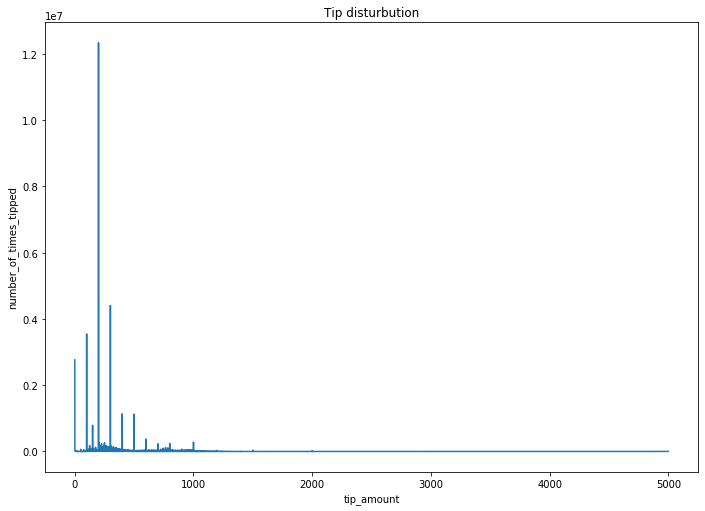

In [102]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.lineplot(x="tip_amount", y="number_of_times_tipped", data=tip_Dis)
ax.set(title="Tip disturbution")

In [105]:
"""Above data shows that most of the tip is between 2000-5000 with average being 2142"""

'Above data shows that most of the tip is between 2000-5000 with average being 2142'

In [106]:
# getting the number of trips by taxis owned by a company.
trips_company_query = """
                       SELECT company AS Company_name, 
                              COUNT(1) AS num_trips
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY Company_name
                       ORDER BY Company_name ASC;
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2042626049)
query_job = client.query(trips_company_query,job_config=safe_config)

trips_company = query_job.to_dataframe()
print(trips_company.head(30))

                                 Company_name  num_trips
0                                        None   41205229
1                 0118 - 42111 Godfrey S.Awir      16528
2                       0118 - Godfray S.Awir         37
3                       0118 - Godfrey S.Awir       3215
4             0694 - 59280 Chinesco Trans Inc      11452
5                   0694 - Chinesco Trans Inc       1350
6                 1085 - 72312 N and W Cab Co      14957
7                       1085 - N and W Cab Co       8712
8                 1247 - 72807 Daniel Ayertey       9240
9                       1247 - Daniel Ayertey       1926
10                 1408 - 89599 Donald Barnes       1809
11                       1408 - Donald Barnes        223
12                     1469 - 64126 Omar Jada       2045
13                 2092 - 61288 Sbeih company      14003
14                       2092 - Sbeih company        516
15                  2192 - 73487 Zeymane Corp      10300
16                        2192 

In [108]:
trips_company = trips_company.iloc[1:]
trips_company.max()

Company_name    Top Cab Affiliation - credit hold
num_trips                                32569932
dtype: object

In [109]:
"""The company  Top Cab Affiliation - credit hold has the highest nbumber of taxi rides over the years """

'The company  Top Cab Affiliation - credit hold has the highest nbumber of taxi rides over the years '

In [2]:
#Areas with most pickups and dropoffs.
print('Areas with the highest number of pickups')
trips_pickup_location_query = """
                       SELECT pickup_community_area AS pickup_location, 
                              COUNT(1) AS num_trips
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY pickup_location
                       ORDER BY num_trips DESC;
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2042626049)
query_job = client.query(trips_pickup_location_query,job_config=safe_config)

trips_location_pickup = query_job.to_dataframe()
print(trips_location_pickup.head(10))
print(" ")
print('Areas with the highest number of droupoffs')
trips_pickup_location_query = """
                       SELECT dropoff_community_area AS dropoff_location, 
                              COUNT(1) AS num_trips
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY dropoff_location
                       ORDER BY num_trips DESC;
                       """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=2042626049)
query_job = client.query(trips_pickup_location_query,job_config=safe_config)

trips_location_dropoff = query_job.to_dataframe()
print(trips_location_dropoff.head(10))

Areas with the highest number of pickups
   pickup_location  num_trips
0              8.0   32104338
1             32.0   21477142
2              NaN   16782342
3             28.0    8481004
4              6.0    6815397
5             76.0    5853830
6              7.0    5477208
7             24.0    3575711
8             33.0    2204222
9              3.0    1643982
 
Areas with the highest number of droupoffs
   dropoff_location  num_trips
0               8.0   28201515
1               NaN   19095838
2              32.0   18480324
3              28.0    9267949
4               6.0    7021590
5               7.0    6275255
6              24.0    4532021
7              76.0    3540993
8              33.0    2831048
9               3.0    1912080


[Text(0.5, 1.0, 'dropoff disturbution')]

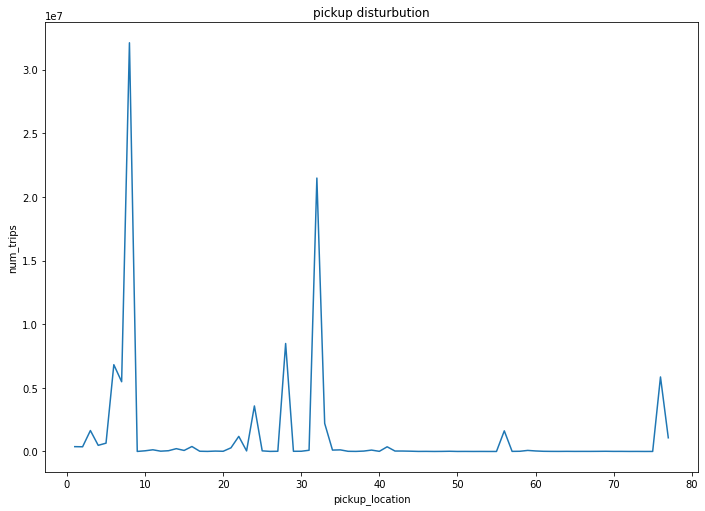

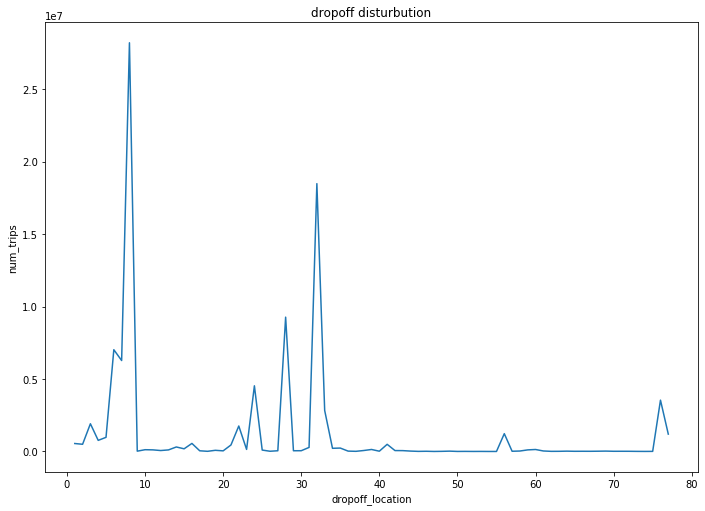

In [5]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.lineplot(x="pickup_location", y="num_trips", data=trips_location_pickup)
ax.set(title="pickup disturbution")
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=1)
ax = sns.lineplot(x="dropoff_location", y="num_trips", data=trips_location_dropoff)
ax.set(title="dropoff disturbution")

In [111]:
"""location=8.0 is popular pickup as well as drop location"""

'location=8.0 is popular pickup as well as drop location'

In [112]:
#peak hours and off hours of the taxis
pickup_query = """
                SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS pickup_time_of_day, 
                        COUNT(*) AS pickup_counts
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                GROUP BY pickup_time_of_day
                ORDER BY pickup_time_of_day ASC;
            """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(pickup_query, job_config=safe_config)

pick_hours = query_job.to_dataframe()
print(pick_hours)

dropoff_query = """
                SELECT EXTRACT(HOUR FROM trip_end_timestamp) AS dropoff_time_of_day, 
                        COUNT(*) AS dropoff_counts
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                WHERE EXTRACT(HOUR FROM trip_end_timestamp)>=0
                GROUP BY dropoff_time_of_day
                ORDER BY dropoff_time_of_day ASC;
            """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(dropoff_query, job_config=safe_config)

drop_hours = query_job.to_dataframe()
#drop_hours = drop_hours.iloc[1:]
print(drop_hours)


    pickup_time_of_day  pickup_counts
0                    0        4397400
1                    1        3684848
2                    2        2952940
3                    3        2211475
4                    4        1477914
5                    5        1165847
6                    6        1429594
7                    7        2540010
8                    8        4149406
9                    9        5122258
10                  10        5003321
11                  11        4999348
12                  12        5435438
13                  13        5589251
14                  14        5543932
15                  15        5585340
16                  16        5892643
17                  17        6473685
18                  18        7288397
19                  19        7616049
20                  20        6992722
21                  21        6159410
22                  22        5850349
23                  23        5298477
    dropoff_time_of_day  dropoff_counts
0         

[Text(0.5, 1.0, 'Number of dropoffs at Different Time')]

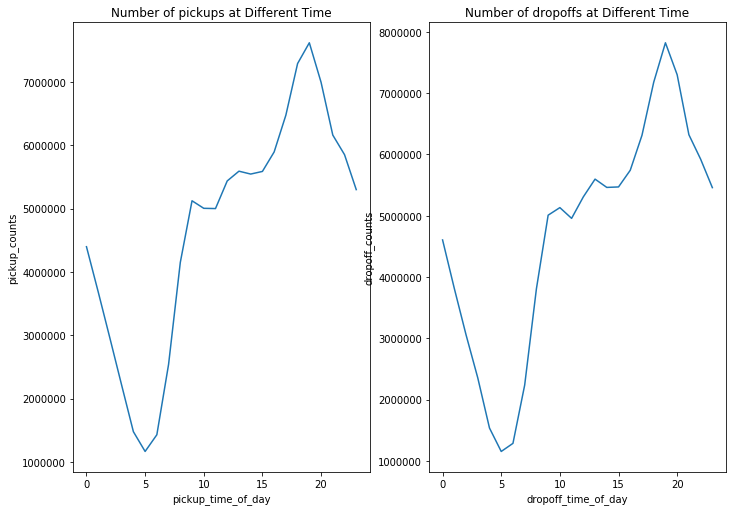

In [115]:
a4_dims = (11.7, 8.27)
fig, axs = plt.subplots(figsize=a4_dims,ncols=2)
ax = sns.lineplot(x="pickup_time_of_day", y="pickup_counts", data=pick_hours,ax=axs[0])
ax.set(title="Number of pickups at Different Time")
ax = sns.lineplot(x="dropoff_time_of_day", y="dropoff_counts", data=drop_hours,ax=axs[1])
ax.set(title="Number of dropoffs at Different Time")

In [116]:
"""Clearly from graph we have peak hour is between 18-20 hrs i.e(6pm-8pm) and off-hour is 3-6 hrs i,e(3am-6am)"""

'Clearly from graph we have peak hour is between 18-20 hrs i.e(6pm-8pm) and off-hour is 3-6 hrs i,e(3am-6am)'

In [117]:
#getting number of trips at different hours of the day.
hour_trip_query= """
                SELECT EXTRACT(HOUR FROM trip_end_timestamp) AS time_of_day, 
                        COUNT(*) AS num_trips
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                WHERE EXTRACT(HOUR FROM trip_end_timestamp)>=0
                GROUP BY time_of_day
                ORDER BY time_of_day ASC;
            """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(hour_trip_query, job_config=safe_config)

hour_trip = query_job.to_dataframe()

print(hour_trip)

    time_of_day  num_trips
0             0    4604975
1             1    3813559
2             2    3056988
3             3    2353892
4             4    1534449
5             5    1152358
6             6    1284479
7             7    2235900
8             8    3806930
9             9    5009074
10           10    5132624
11           11    4957189
12           12    5308046
13           13    5597513
14           14    5462347
15           15    5470037
16           16    5742275
17           17    6313057
18           18    7178897
19           19    7823328
20           20    7301276
21           21    6322367
22           22    5923780
23           23    5458846


In [120]:
"""Even this table show us that between 6pm and 8pm we have most number of trips."""

'Even this table show us that between 6pm and 8pm we have most number of trips.'

In [47]:
taxi_ride_pattern_query = """SELECT trip_miles,
                    COUNT(1) AS number_of_rides
                    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                    GROUP BY trip_miles
                    ORDER by trip_miles ASC;
                 """
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=16477323265)
query_job = client.query(taxi_ride_pattern_query, job_config=safe_config)

taxi_ride_pattern= query_job.to_dataframe()
print(taxi_ride_pattern)

      trip_miles  number_of_rides
0            NaN              633
1           0.00         33452754
2           0.01            16902
3           0.02            14089
4           0.03            20711
5           0.04            33362
6           0.05            48393
7           0.06            62021
8           0.07            72032
9           0.08            76766
10          0.09            77935
11          0.10          3910277
12          0.11            74415
13          0.12            70595
14          0.13            65227
15          0.14            60760
16          0.15            56357
17          0.16            51832
18          0.17            49031
19          0.18            44788
20          0.19            40996
21          0.20          1783591
22          0.21            35062
23          0.22            32076
24          0.23            30189
25          0.24            28263
26          0.25            26653
27          0.26            25482
28          0.

In [48]:
print(taxi_ride_pattern.max())

trip_miles             3460.0
number_of_rides    33452754.0
dtype: float64


In [49]:
print(taxi_ride_pattern.median())

trip_miles         51.895
number_of_rides     8.000
dtype: float64
